### Introduction 

#### Project Objective 
The objective of this project is to build a machine learning model to predict and minimize customer churn from credit card at the bank.

#### Libraries

In [2]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ( AdaBoostClassifier,
                                GradientBoostingClassifier,
                                BaggingClassifier,
                                RandomForestClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Metric scores
from sklearn.metrics import (f1_score,
                            accuracy_score,
                            recall_score,
                            precision_score,
                            confusion_matrix,
                            roc_auc_score,
                            plot_confusion_matrix,
)


# To impute missing values and handle modeling
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# To supress warnings
import warnings

warnings.filterwarnings("ignore")

#### Import Data
This is a dataset obtain from Kaggle with the url= https://www.kaggle.com/datasets/anwarsan/credit-card-bank-churn

In [3]:
# read in the data
bank_churn= pd.read_csv('/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_FinalProject/Data/BankChurners.csv')


#### Data Dictionary
![Alt text](data_dictionary.png)


### Data Overview


In [135]:
print('Number of Rows in DataFrame:', bank_churn.shape[0])
print('Number of Columns In DataFrame:', bank_churn.shape[1])

Number of Rows in DataFrame: 10127
Number of Columns In DataFrame: 20


In [4]:
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [133]:
# display top 5 row of the dataset
bank_churn.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [138]:
# Overall Statististic of datset
bank_churn.describe(include= 'all').round(1).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.0,NaN,NaN,NaN,46.3,8.0,26.0,41.0,46.0,52.0,73.0
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.0,NaN,NaN,NaN,2.3,1.3,0.0,1.0,2.0,3.0,5.0
Education_Level,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.0,NaN,NaN,NaN,35.9,8.0,13.0,31.0,36.0,40.0,56.0
Total_Relationship_Count,10127.0,NaN,NaN,NaN,3.8,1.6,1.0,3.0,4.0,5.0,6.0


In [132]:
# Check for missing data
bank_churn.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- Dropping Irelevant information:
    - ['CLIENTNUM']
    - The lAst 2 columns in the DataFrame

In [7]:
# Drop ['CLIENTNUM']
bank_churn= bank_churn.drop(columns='CLIENTNUM')
# Drop the last 2 columns in the DataFrame
bank_churn = bank_churn.iloc[:, :-2]
# Checking the DataFrame
bank_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [8]:
# Checking for n/a data
bank_churn.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
# Filter out data categorical data
category=bank_churn.select_dtypes(exclude=np.number)
# Drop categorical feature
numerical= bank_churn.drop(columns=category)

In [11]:
category

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [12]:
# Checking for value counts for each category
for column in category:
    value_counts = category[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n{'='*40}\n")

Value counts for Attrition_Flag:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Value counts for Gender:
F    5358
M    4769
Name: Gender, dtype: int64

Value counts for Education_Level:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Value counts for Marital_Status:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

Value counts for Income_Category:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

Value counts for Card_Category:
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64



- There are unknown info in :
    - Education_Level
    - Marital_Status
    - Income_Category

In [157]:

unknown_income=bank_churn[bank_churn['Income_Category'] == 'Unknown']

In [158]:
unknown_income.describe(include='all').round(1).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,1112,2,Existing Customer,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,1112.0,NaN,NaN,NaN,46.3,8.7,26.0,41.0,46.0,52.0,68.0
Gender,1112,2,F,1060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,1112.0,NaN,NaN,NaN,2.3,1.3,0.0,1.0,2.0,3.0,5.0
Education_Level,1112,7,Graduate,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,1112,4,Married,493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,1112,1,Unknown,1112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,1112,4,Blue,1045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,1112.0,NaN,NaN,NaN,35.8,8.5,13.0,31.0,36.0,40.0,56.0
Total_Relationship_Count,1112.0,NaN,NaN,NaN,3.8,1.5,1.0,3.0,4.0,5.0,6.0


In [15]:
# Checking for unknown value 
for column in unknown_income:
    value_counts = unknown_income[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n{'='*40}\n")

Value counts for Attrition_Flag:
Existing Customer    925
Attrited Customer    187
Name: Attrition_Flag, dtype: int64

Value counts for Gender:
F    1060
M      52
Name: Gender, dtype: int64

Value counts for Education_Level:
Graduate         332
High School      225
Uneducated       185
Unknown          145
College          108
Doctorate         70
Post-Graduate     47
Name: Education_Level, dtype: int64

Value counts for Marital_Status:
Married     493
Single      444
Divorced     93
Unknown      82
Name: Marital_Status, dtype: int64

Value counts for Income_Category:
Unknown    1112
Name: Income_Category, dtype: int64

Value counts for Card_Category:
Blue        1045
Silver        53
Gold           9
Platinum       5
Name: Card_Category, dtype: int64



- Unknown category data did not contribute to any missing or null value in numerical data.
- Keep unknown object as is for modeling

### EDA

In [86]:
def plot_pie_charts(df, columns):
    """ Create multiple pie chart from the categorical dataframe for comparision
    Args:
    df= dataframe
    columns= list of columns to be plotted as a piechart"""
    # Set up for pie chart
    subplot_cols = 2
    subplot_rows = int(len(columns) / 2 + 1)
    plt.figure(figsize=(20, 5 * subplot_rows))
    # Plot pie chart
    for i, col in enumerate(columns):
        data= df[col].value_counts()
        labels=data.index
        plt.subplot(subplot_rows, subplot_cols, i + 1)
        ax = plt.pie(data.values, autopct='%1.1f%%', labels=labels, colors='crest')
        plt.title(f'Churn by {col}')

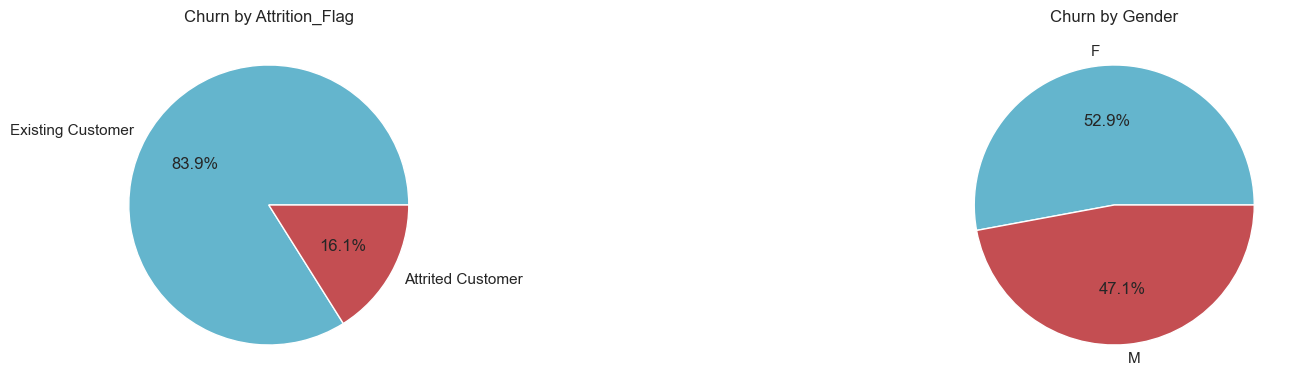

In [87]:
cat_columns= ['Attrition_Flag', 'Gender']
plot_pie_charts(category, columns= cat_columns )

- Churn rate at the bank is 16.1%
- No significant different between men and women who cancel credit card

In [100]:
def plot_bar_chart(data, column):
    # Set up for pie chart
    subplot_cols = 2
    subplot_rows = int(len(cat_columns) / 2 + 1)
    plt.figure(figsize=(20, 5 * subplot_rows))
    sns.set_theme(style="darkgrid")
     # Plot pie chart
    for i, col in enumerate(column):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index   
        ax=sns.countplot(data=data, x=col, palette = 'crest', order=order)
        plt.tight_layout()
        plt.title(str(i + 1) + '.' + f'Bar chart of {col} of Customer Attrited')


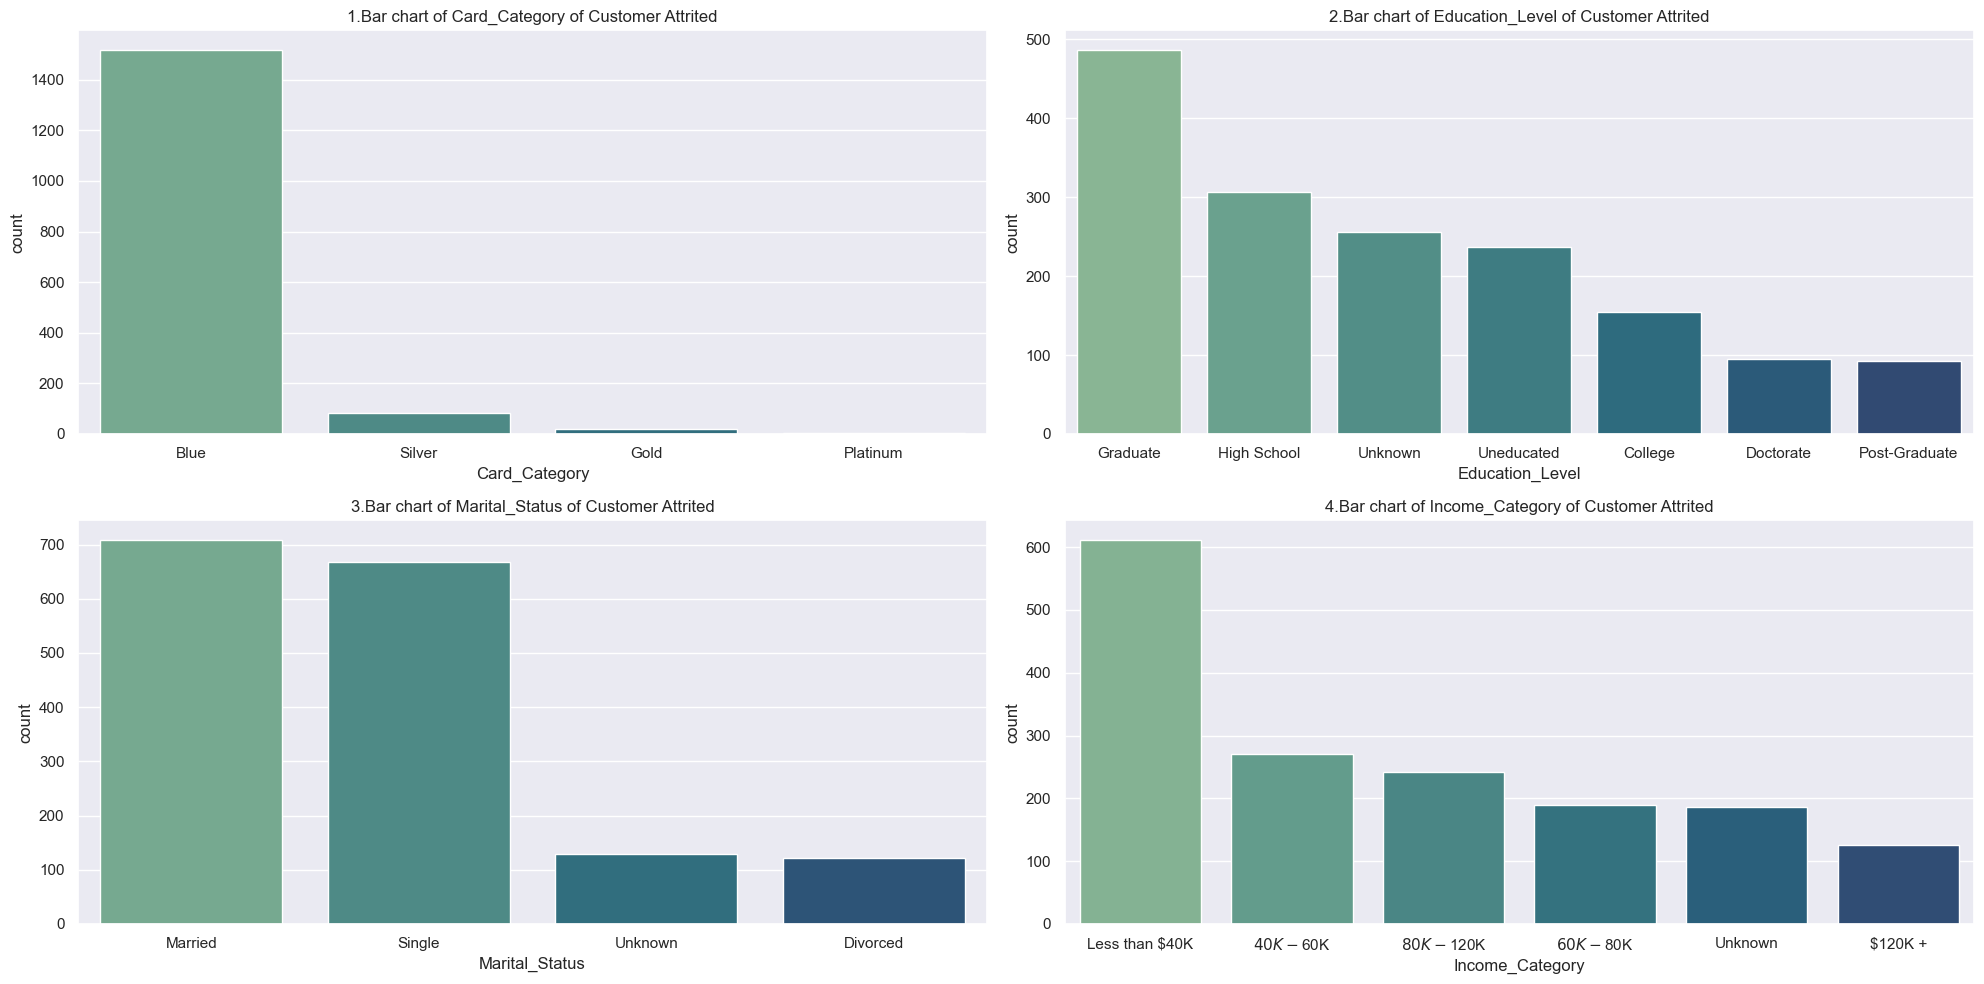

In [101]:
columns=['Card_Category','Education_Level', 'Marital_Status', 'Income_Category']
plot_bar_chart(attrited_customer, column=columns)

- Majority of churn rate is from blue card holders from customers with income less than 40K
- Majority of customer canceling has graduate level education


array([[<AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>,
        <AxesSubplot:title={'center':'Total_Relationship_Count'}>],
       [<AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Revolving_Bal'}>],
       [<AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>,
        <AxesSubplot:title={'center':'Total_Trans_Ct'}>],
       [<AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

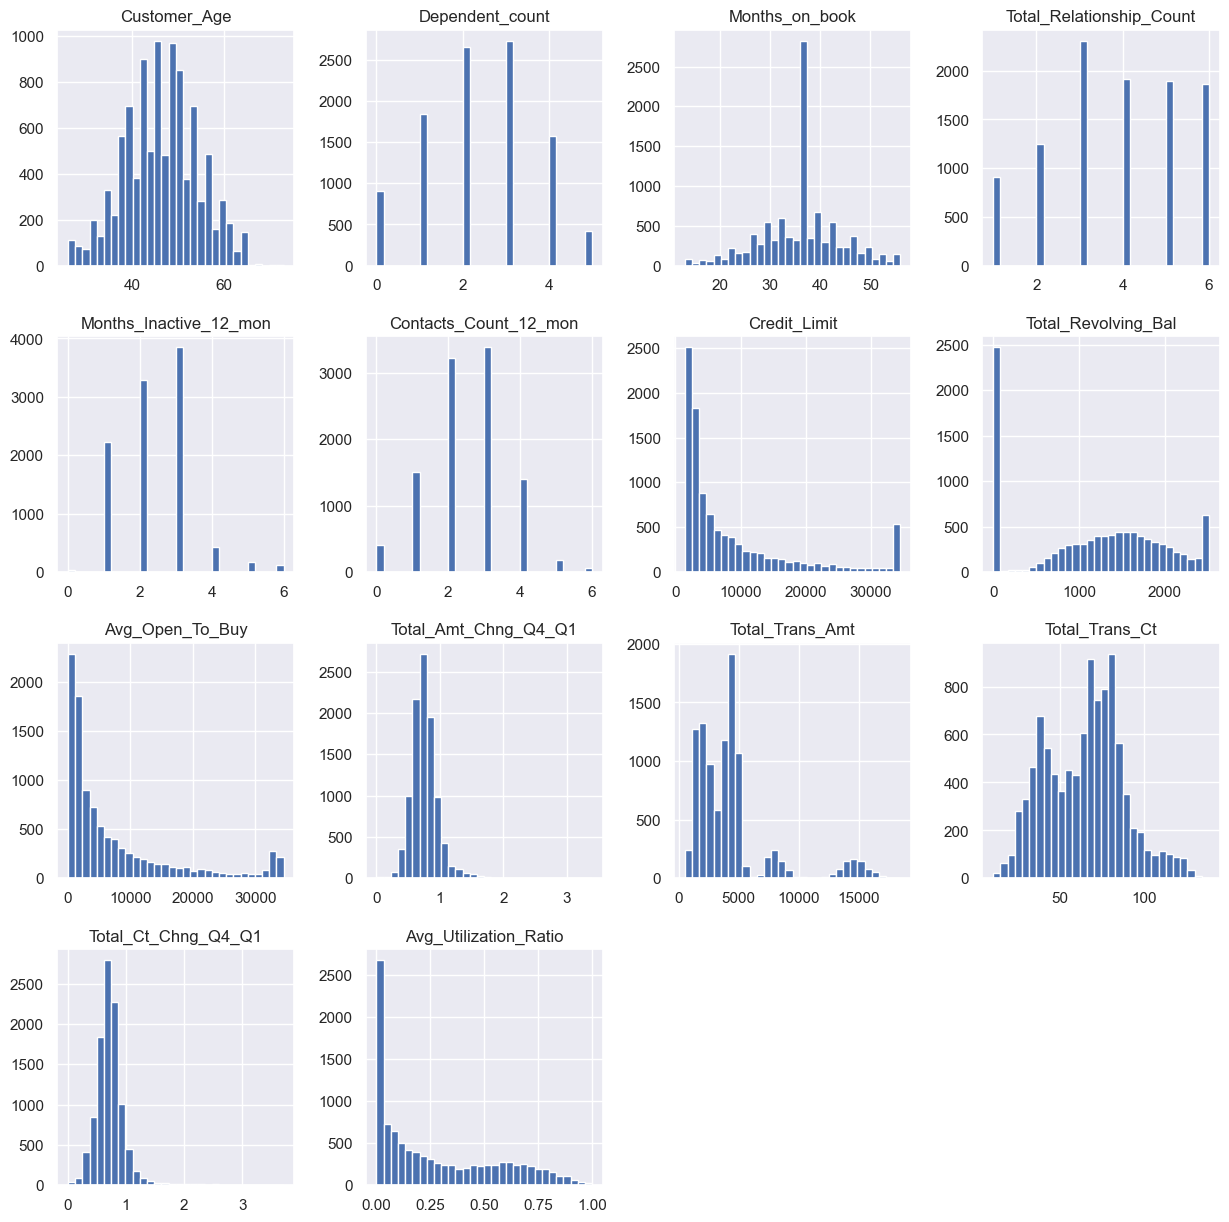

In [27]:
# Ploting histogram of numerical data to inspect distribution
numerical.hist(bins=30, figsize=(15,15) )

In [28]:
correlation=numerical.corr().round(2)

In [29]:
correlation

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.00,-0.12,0.79,-0.01,0.05,-0.02,0.00,0.01,0.00,-0.06,-0.05,-0.07,-0.01,0.01
Dependent_count,-0.12,1.00,-0.10,-0.04,-0.01,-0.04,0.07,-0.00,0.07,-0.04,0.03,0.05,0.01,-0.04
Months_on_book,0.79,-0.10,1.00,-0.01,0.07,-0.01,0.01,0.01,0.01,-0.05,-0.04,-0.05,-0.01,-0.01
Total_Relationship_Count,-0.01,-0.04,-0.01,1.00,-0.00,0.06,-0.07,0.01,-0.07,0.05,-0.35,-0.24,0.04,0.07
Months_Inactive_12_mon,0.05,-0.01,0.07,-0.00,1.00,0.03,-0.02,-0.04,-0.02,-0.03,-0.04,-0.04,-0.04,-0.01
Contacts_Count_12_mon,-0.02,-0.04,-0.01,0.06,0.03,1.00,0.02,-0.05,0.03,-0.02,-0.11,-0.15,-0.09,-0.06
Credit_Limit,0.00,0.07,0.01,-0.07,-0.02,0.02,1.00,0.04,1.00,0.01,0.17,0.08,-0.00,-0.48
Total_Revolving_Bal,0.01,-0.00,0.01,0.01,-0.04,-0.05,0.04,1.00,-0.05,0.06,0.06,0.06,0.09,0.62
Avg_Open_To_Buy,0.00,0.07,0.01,-0.07,-0.02,0.03,1.00,-0.05,1.00,0.01,0.17,0.07,-0.01,-0.54
Total_Amt_Chng_Q4_Q1,-0.06,-0.04,-0.05,0.05,-0.03,-0.02,0.01,0.06,0.01,1.00,0.04,0.01,0.38,0.04


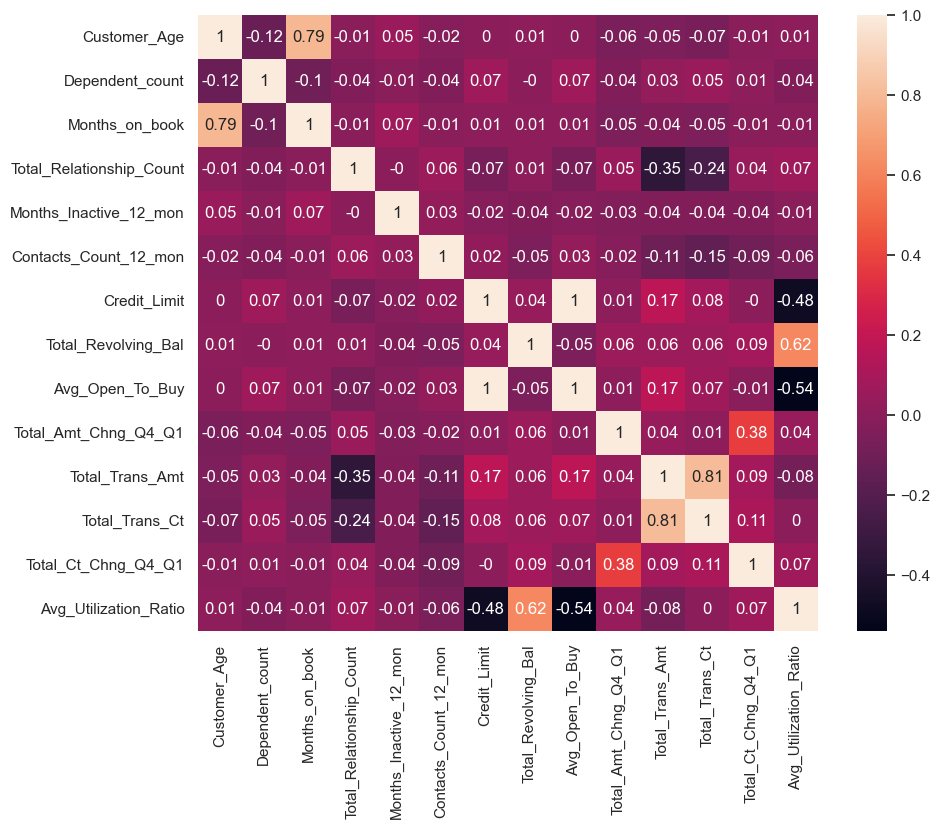

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot = True);

In [144]:
def boxplot_by_target(data, hue):   
    numerical_columns = data.select_dtypes(include='number').columns
    num_columns = len(numerical_columns)
    subplot_cols = 2
    subplot_rows = (num_columns + 1) // 2
    plt.figure(figsize=(15, 5 * subplot_rows))
    for i, col in enumerate(numerical_columns):
        plt.subplot(subplot_rows,subplot_cols,i + 1)
        sns.boxplot( data=data, x=hue, y=col, orient="vertical", palette="crest" )
        plt.tight_layout()
        plt.title(str(i + 1) + ". " + f'Boxplot of {col}')

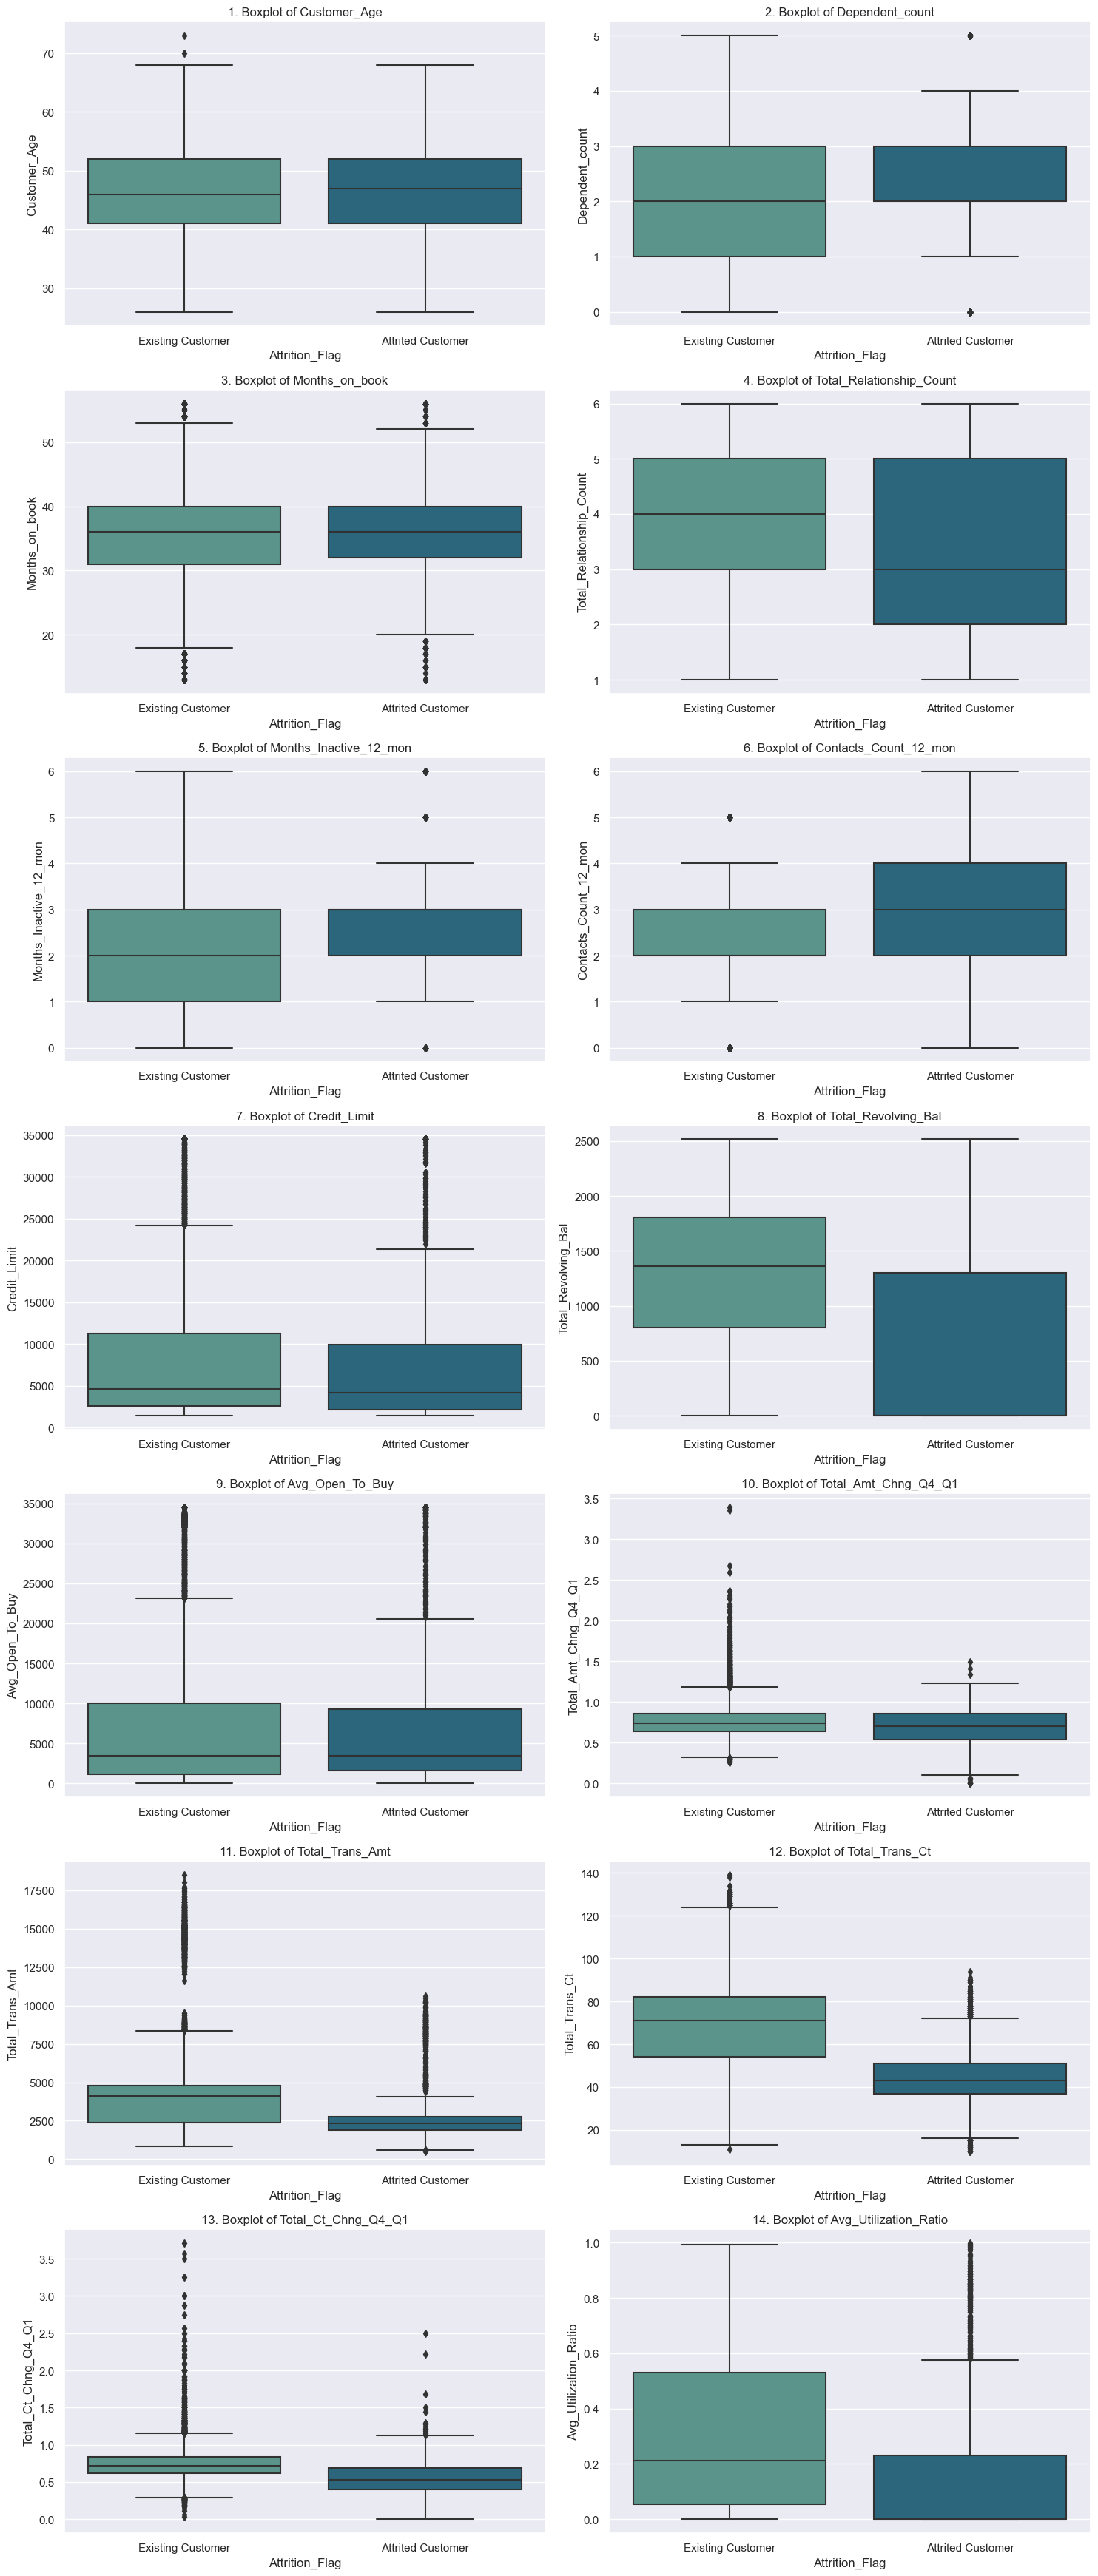

In [145]:
boxplot_by_target(bank_churn, hue= 'Attrition_Flag')


- There are more older customer attrited 
- Pattern in attrited customer:
    - Lower Total_Relationship_Count
    - Higher Months_Inactive_12_mon
    - Higher Contacts_Count_12_mon
    - Lower Credit_Limit
    - Lower in Total_Revolving_Bal
    - Lower in Total_Amt_Chng_Q4_Q1
    - Lower in Total_Trans_Amt
    - Lower in Total_Trans_Ct
    - Lower in Total_Ct_Chng_Q4_Q1
    - Lower Avg_Utilization_Ratio

In [159]:
def plot_numerical_boxplots(data):
    numerical_columns = data.select_dtypes(include='number').columns
    num_columns = len(numerical_columns)
    subplot_cols = 2
    subplot_rows = (num_columns + 1) // 2
    
    plt.figure(figsize=(15, 5 * subplot_rows))
    
    for i, col in enumerate(numerical_columns):
        plt.subplot(subplot_rows, subplot_cols, i + 1)
        sns.boxplot(y=data[col], palette="crest")
        plt.title(f'Box Plot of {col}')
    
    plt.tight_layout()
    plt.show()

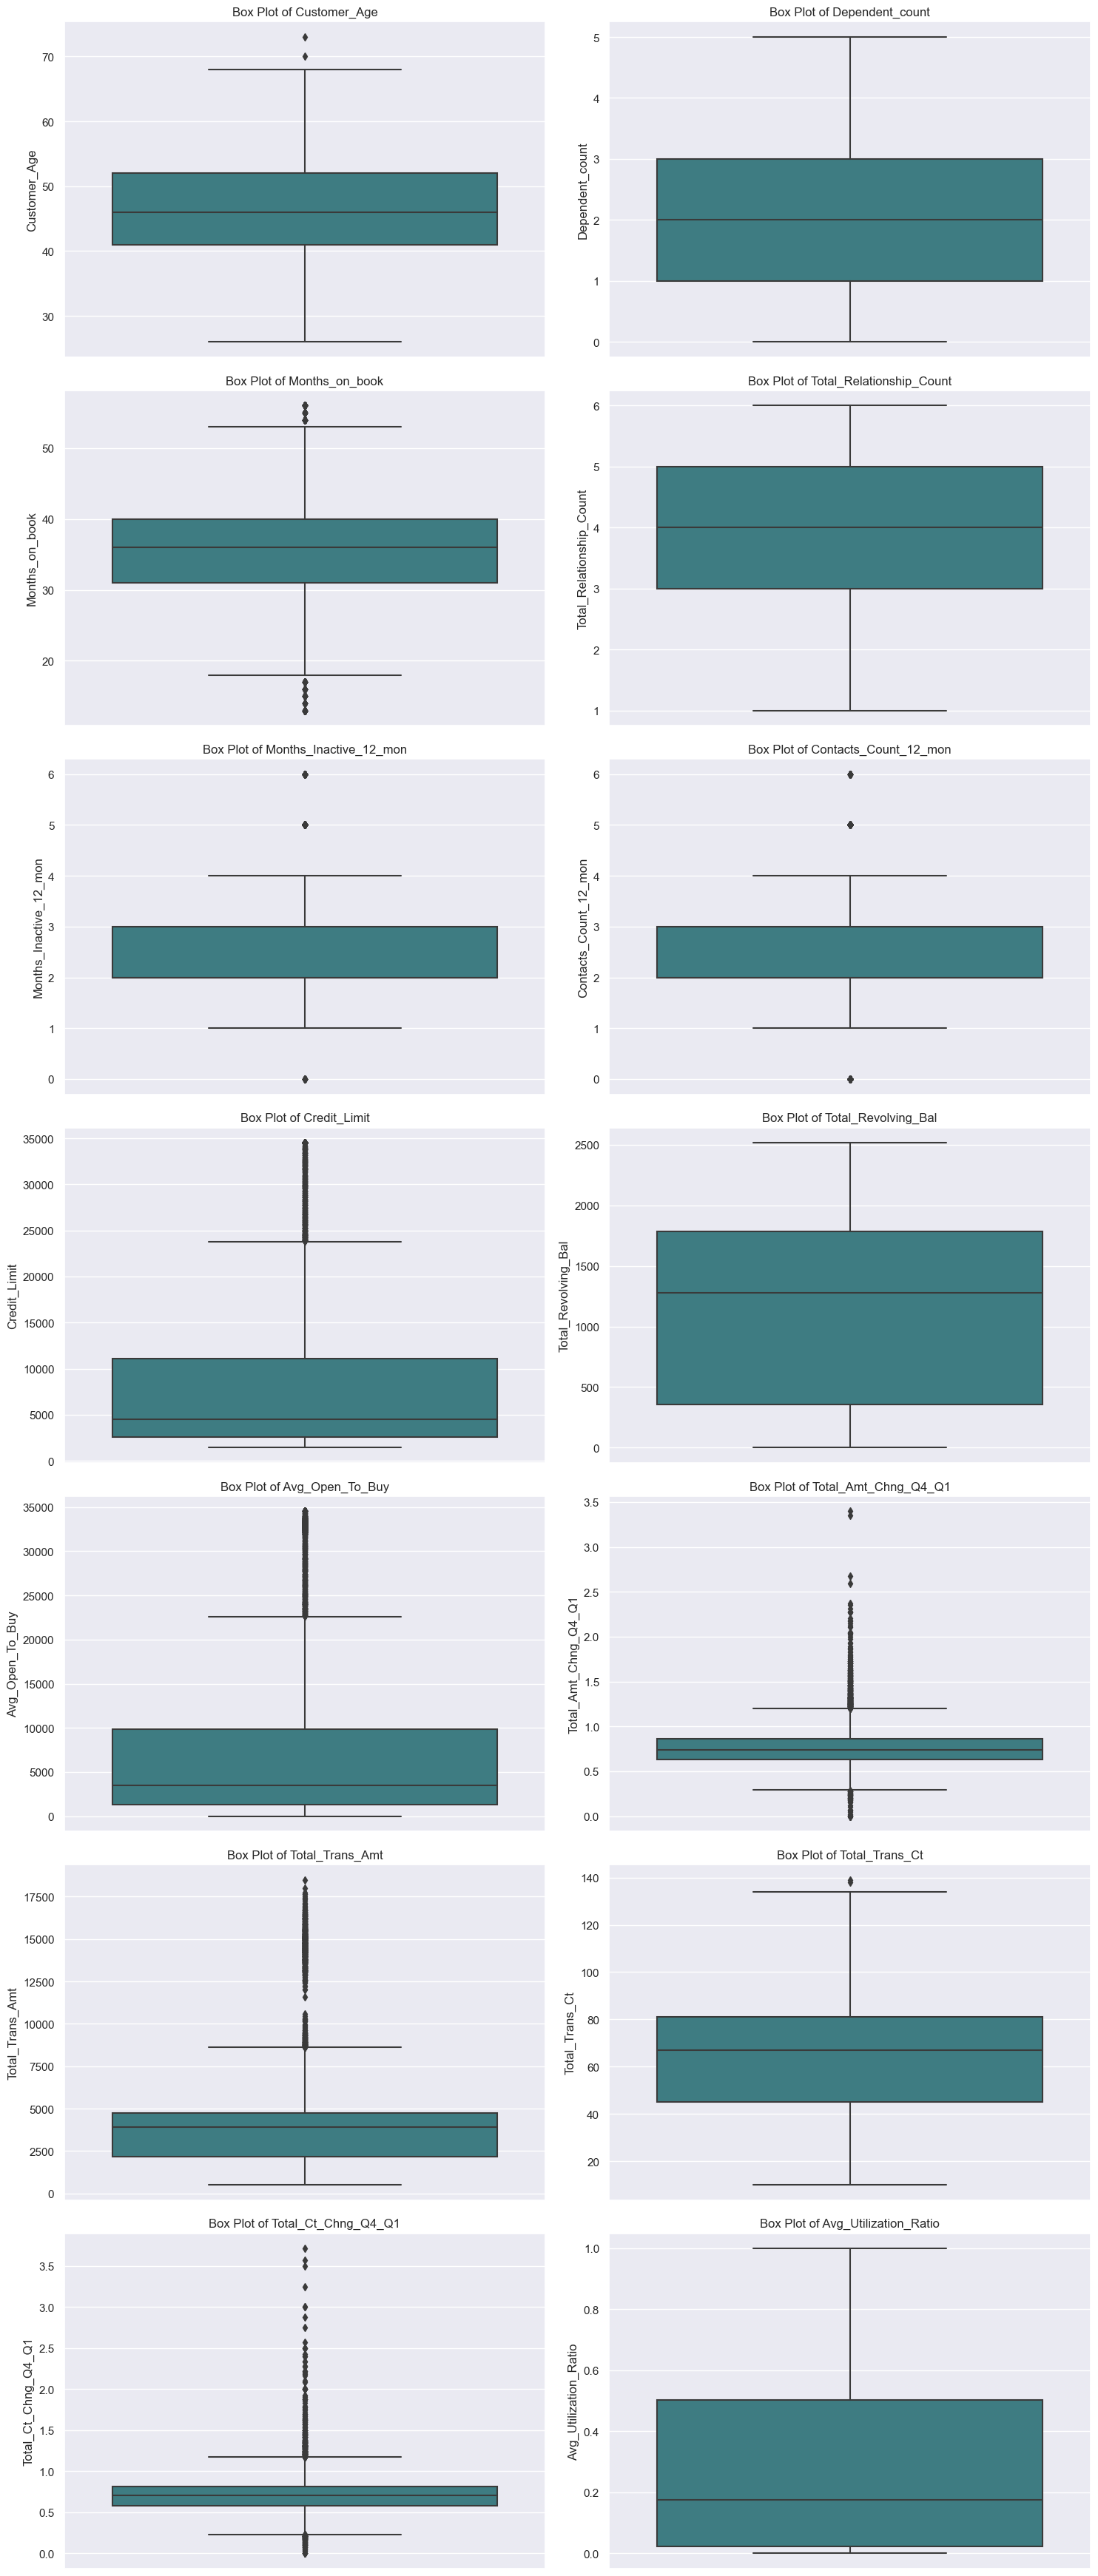

In [160]:
plot_numerical_boxplots( bank_churn)

In [74]:
bank_churn[bank_churn['Total_Amt_Chng_Q4_Q1']>=2.5]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24
12,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.0,0,11751.0,3.397,1539,17
773,Existing Customer,61,M,0,Post-Graduate,Married,Unknown,Blue,53,6,2,3,14434.0,1927,12507.0,2.675,1731,32


In [163]:
bank_churn[bank_churn['Total_Ct_Chng_Q4_Q1']>=2.7]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
12,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.0,0,11751.0,3.397,1539,17,3.250,0.000
113,Existing Customer,54,F,0,Uneducated,Married,Less than $40K,Blue,36,2,2,2,1494.0,706,788.0,1.674,1305,24,3.000,0.473
146,Existing Customer,41,F,2,Graduate,Single,Less than $40K,Blue,32,6,3,2,2250.0,2117,133.0,1.162,1617,31,2.875,0.941
190,Existing Customer,57,M,1,Graduate,Married,$80K - $120K,Blue,47,5,3,1,14612.0,1976,12636.0,1.768,1827,24,3.000,0.135
269,Existing Customer,54,M,5,Graduate,Married,$60K - $80K,Blue,38,3,3,3,2290.0,1434,856.0,0.923,1119,18,3.500,0.626
366,Existing Customer,36,F,4,Graduate,Married,$40K - $60K,Blue,36,6,3,3,1628.0,969,659.0,0.999,1893,15,2.750,0.595
773,Existing Customer,61,M,0,Post-Graduate,Married,Unknown,Blue,53,6,2,3,14434.0,1927,12507.0,2.675,1731,32,3.571,0.134


In [167]:
bank_churn[bank_churn['Total_Trans_Ct']>=135]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9324,Existing Customer,41,M,3,Unknown,Married,$120K +,Blue,33,2,4,3,34516.0,638,33878.0,0.724,13085,139,0.675,0.018
9586,Existing Customer,56,F,1,High School,Married,Unknown,Blue,49,1,2,1,17542.0,2517,15025.0,0.800,13939,138,0.792,0.143


- Outlier observe from distribution plot:
    - ['Total_Amt_Chng_Q4_Q1']>=2.5
    - ['Total_Ct_Chng_Q4_Q1']>=2.7
    - ['Total_Trans_Ct']>=135
- To be remove in data preprocessing prior to modeling
    